In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

import PIL #Pillow library for reading image. pip install Pillow.

## compressing a black and white image

original image size : 307200.0 	 height = 480.0 	 width = 640.0


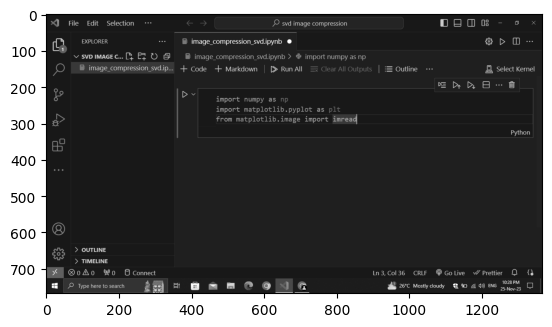

In [14]:
# reading an image
img = PIL.Image.open('image_1.png') #this image is in RGB format
# converting to black and white image.
img_bw = img.convert('L')


plt.imshow(img_bw, cmap='gray') #displaying the image.

# size of original image
fig = plt.gcf() #gcf() -> gets current figure
size_original = fig.get_size_inches() * fig.dpi
print(f"original image size : {size_original[0]*size_original[1]} \t height = {size_original[1]} \t width = {size_original[0]}")

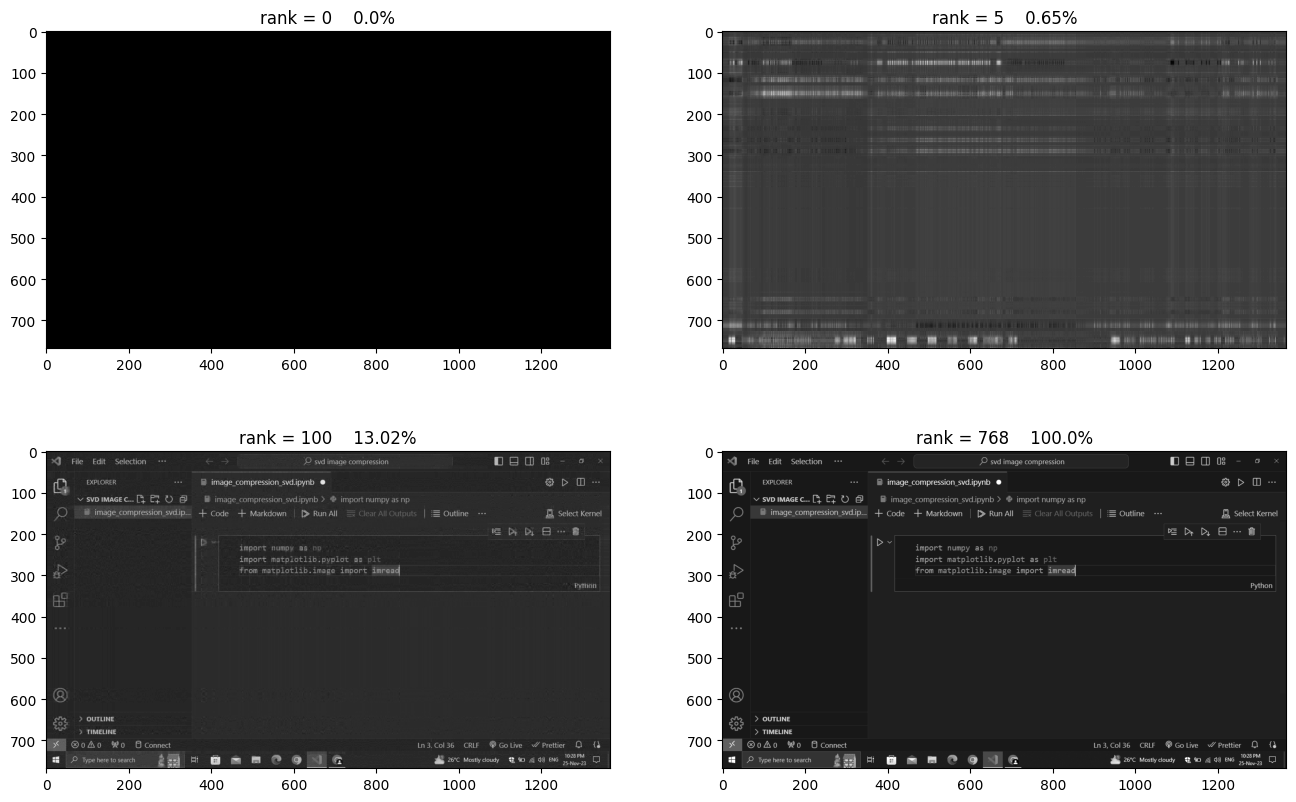

In [19]:
U, S, VT = np.linalg.svd(img_bw, full_matrices=False)
S = np.diag(S)

fig, ax  = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))

for i, r in zip([[0, 0], [0, 1], [1, 0], [1, 1]], (0, 5, 100, U.shape[0])):
    img_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :] # '@' used for matrix multiplication in python

    ax[i[0]][i[1]].imshow(img_approx, cmap = 'gray')
    ax[i[0]][i[1]].set_title('rank = ' + str(r) + '    ' + str(np.round((r/U.shape[0])*100, 2)) + '%')

plt.show()


## compressing color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


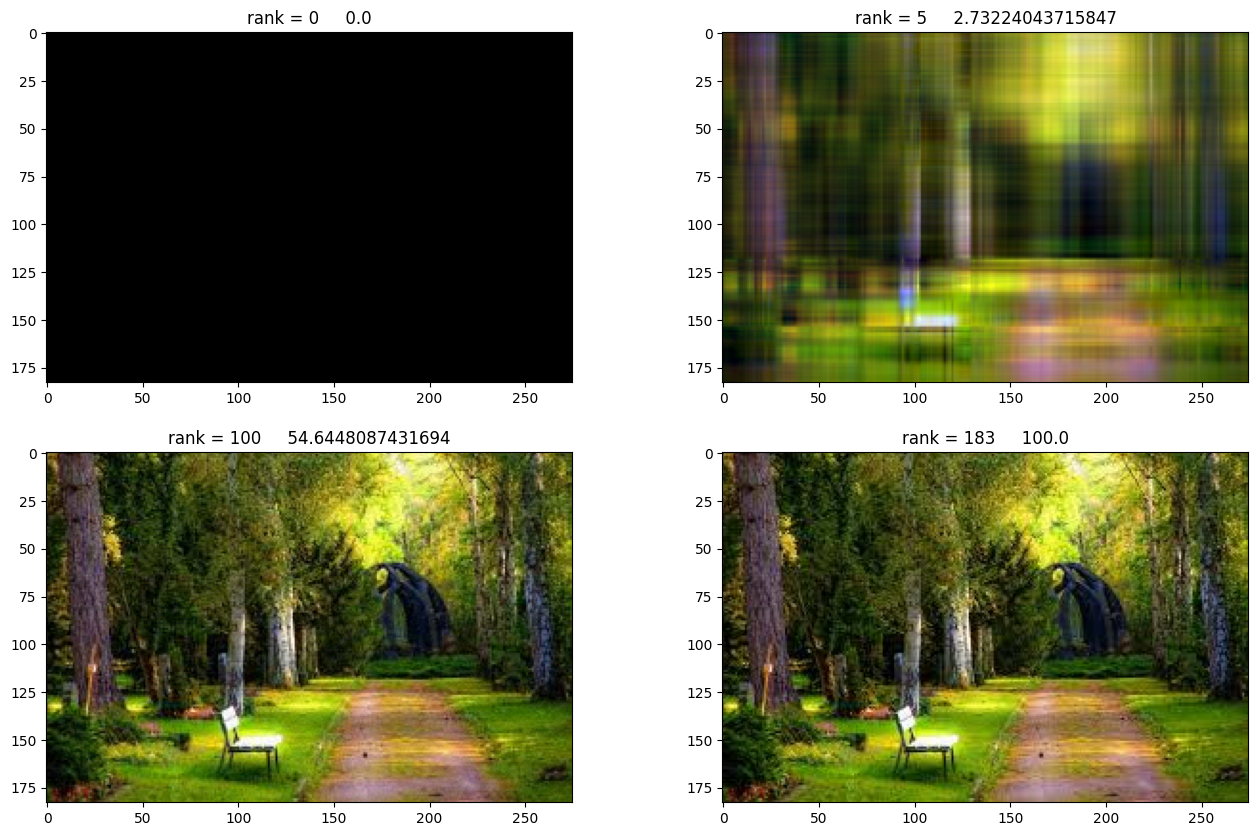

In [22]:
img = plt.imread("nature1.jpg")

r = img[:, :, 0] # red
g = img[:, :, 1] # green
b = img[:, :, 2] # blue

ur, sr, vr = np.linalg.svd(r, full_matrices=False)
sr = np.diag(sr)
ug, sg, vg = np.linalg.svd(g, full_matrices=False)
sg = np.diag(sg)
ub, sb, vb = np.linalg.svd(b, full_matrices=False)
sb = np.diag(sb)

fig, ax = plt.subplots(nrows = 2, ncols=2, figsize = (16, 10))

for i, rank in zip([[0, 0], [0, 1], [1, 0], [1, 1]], (0, 5, 100, ur.shape[0])):

    compressed_r = ur[:, :rank] @ sr[0:rank, :rank] @ vr[:rank, :]
    compressed_g = ug[:, :rank] @ sg[0:rank, :rank] @ vg[:rank, :]
    compressed_b = ub[:, :rank] @ sb[0:rank, :rank] @ vb[:rank, :]

    compressed_r = compressed_r.astype('int')
    compressed_g = compressed_g.astype('int')
    compressed_b = compressed_b.astype('int')

    # stacking the matrices
    img_approx = np.stack((compressed_r, compressed_g, compressed_b), axis = 2)

    ax[i[0]][i[1]].imshow(img_approx)
    ax[i[0]][i[1]].set_title('rank = ' + str(rank) + '     ' + str((rank * 100) / ur.shape[0]))

